## Description

Write a program to solve a Sudoku puzzle by filling the empty cells.

A sudoku solution must satisfy all of the following rules:

Each of the digits 1-9 must occur exactly once in each row.
Each of the digits 1-9 must occur exactly once in each column.
Each of the digits 1-9 must occur exactly once in each of the 9 3x3 sub-boxes of the grid.
The '.' character indicates empty cells.


## Example 1:

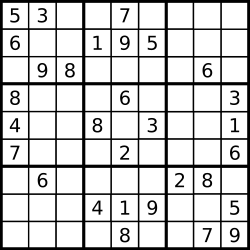

Input: board = 

[["5","3",".",".","7",".",".",".","."],

["6",".",".","1","9","5",".",".","."],

[".","9","8",".",".",".",".","6","."],

["8",".",".",".","6",".",".",".","3"],

["4",".",".","8",".","3",".",".","1"],

["7",".",".",".","2",".",".",".","6"],

[".","6",".",".",".",".","2","8","."],

[".",".",".","4","1","9",".",".","5"],

[".",".",".",".","8",".",".","7","9"]]

Output: 

[["5","3","4","6","7","8","9","1","2"],

["6","7","2","1","9","5","3","4","8"],

["1","9","8","3","4","2","5","6","7"],

["8","5","9","7","6","1","4","2","3"],

["4","2","6","8","5","3","7","9","1"],

["7","1","3","9","2","4","8","5","6"],

["9","6","1","5","3","7","2","8","4"],

["2","8","7","4","1","9","6","3","5"],

["3","4","5","2","8","6","1","7","9"]]

Explanation: The input board is shown above and the only valid solution is shown below:

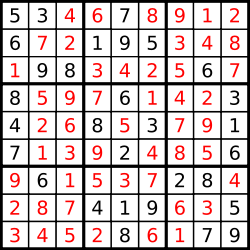

## Constraints:

board.length == 9

board[i].length == 9

board[i][j] is a digit or '.'.

It is guaranteed that the input board has only one solution.

In [4]:
from __future__ import annotations #this was imported so that I could use built in types as generics. 
# Only >3.9 versions of python can use built in types as generics without this import.

6

In [6]:
# First accepted solution. This particular method goes through the following steps in order to solve a sudoku board:

# 1. Utilize row, column, and matrice dictionaries containing sets to keep track of what numbers are currently present
# within a given row, column, or 3x3 matrice. Utilize these in conjunction with a 'default' set containing numbers
# 1 through 9 to determine valid numbers that can be placed within empty cells given the information that we currently
# have regarding the sudoku board. Store these 'possibilities' within a dictionary of sets, and return said dictionary.
# I have defined a function 'findsolutions' for this particular step.

# 2. Utilize a while loop in order to fill out the sudoku board with the numbers in the 'possibilities' dictionary 
# that we just returned. However, we will only fill out those cells in the sudoku board that have only a single valid
# number to input according to the 'possibilities' dictionary that we are currently using. After this, we rerun
# the 'findsolutions' function and acquire a new 'possibilities' dictionary that has been updated to account for the 
# cells that we just filled. While loop will continue to repeat so long as the 'possibilities' dictionary continues
# to contain possible valid numbers for any cell. If the 'possibilities' dictionary does not have any valid numbers for
# any cell, it means that the sudoku board has been filled completely, in which case the while loop will end and the
# 'check_if_solved' function will output True, finishing the problem. 

# 3. In the case that any iteration of our 'possibilities' dictionary does not contain a set of possible valid numbers 
# for a given cell with only one possible number, (i.e we cannot find a cell with a single valid input number based on
# the information we have on the board in its current state), the while loop will break, and the subsequent
# 'check_if_solved' function will return False. In this case, the next part of our solution, a backtracking function,
# will begin to work. Prior to actually running the backtracking function, however, we utilize another set of row, 
# column, and matrice dictionaries (containing sets) to keep track of what numbers are currently within the sudoku board.
# After collecting this information, we start a backtracking function that works as follows:

# a. take in a row and column pair then declare nonlocal variable solved to keep track of whether backtracking has 
# completed

# b. check if r == 9. If so, that means we've filled out the board in its entirity in such a way that is valid. This is
# our base case.

# c. set our next row and column pair. This is done in such a way that allows for us to increment our columns from 
# 0 to 8 for every row we are on, and allows for us to increment our rows only once we know we've finished going through
# each column in a given row.

# d. check if the current row/column pair we are on (aka current cell) is filled. If so, we just call the backtracking
# function on the next row/column pair.

# e. if the current row/column pair we are on is empty, we utilize the latest iteration of our 'possibilities'
# function to get the set of possible numbers for our current row/column pair. We iterate through this set, checking
# if the number specified during the current iteration is present within the current column/row/(row//3,column//3)
# positions of the column, row, or matrice dictionaries of sets. If it is present, we skip to the next number in the
# current row/column pair set in our possibilities dictionary. If it is not, we add it to the appropriate sets within
# the column, row, and matrice dictionaries and then set our current row/column position in the board to that number.
# Then, we call our backtracking function with the next row/column pair. 

# f. Finally, if our recursion fails to fill out the board completely, it means our 'solved' variable is still False.
# In such case each stack will run code to remove the number it added from the board position it added to. Moreover,
# it will also remove said number from the appropriate row/column/(row//3, column//3) positions in the row, column, and
# matrice dictionaries. This runs until we are able to find a valid solution to the board, at which point r==9 triggers
# and solved is set to True, which then ends the recursive function.




class Solution:
    def solveSudoku(self, board: List[List[str]]) -> None:
        """
        Do not return anything, modify board in-place instead.
        """
        def findsolutions(board):
            rows = collections.defaultdict(set)
            columns = collections.defaultdict(set)
            matrices = collections.defaultdict(set) # where key is (r//3, c//3) tuple
            possibilities = collections.defaultdict(set)
            for r in range(9):
                for c in range(9):
                    if board[r][c]=='.':
                        continue
                    else:
                        # if board[r][c] in rows[r] or board[r][c] in columns[c] or board[r][c] in matrices[(r//3,c//3)]:
                        #     return False
                        rows[r].add(board[r][c])
                        columns[c].add(board[r][c])
                        matrices[(r//3, c//3)].add(board[r][c])
        # print(default_set - rows[0]-columns[2]-matrices[(0,0)])
            for r in range(9):
                for c in range(9):
                    default_set = {'1', '2', '3', '4', '5', '6', '7', '8', '9'}
                    if board[r][c]!='.':
                        continue
                    else:
                        yah = default_set-rows[r]-columns[c]-matrices[(r//3, c//3)]
                        # if len(yah) == 0:
                        #     return False
                        for i in yah:
                            possibilities[(r,c)].add(i)
                            
            return possibilities
        
        def check_if_solved():
            for r in range(9):
                for c in range(9):
                    if board[r][c] == '.':
                        return False
            return True
        
        def recursive_solve(r, c):
            nonlocal solved
            if r ==9:
                solved = True
                return
            new_r = r + (c+1)//9
            new_c = (c+1)%9
            if board[r][c]!='.':
                recursive_solve(new_r, new_c)
            else:
                for num in current[(r,c)]:
                    if num not in rows_2[r] and num not in columns_2[c] and num not in matrices_2[(r//3,c//3)]:
                        rows_2[r].add(num)
                        columns_2[c].add(num)
                        matrices_2[(r//3, c//3)].add(num)
                        board[r][c] = num
                        recursive_solve(new_r, new_c)
                        
                        if not solved:
                            rows_2[r].remove(num)
                            columns_2[c].remove(num)
                            matrices_2[(r//3, c//3)].remove(num)
                            board[r][c] = '.'
        
        
        current = findsolutions(board)
        while len(current)>0:
            y = 0
            for i in current:
                if len(current[i]) == 1:
                    y+=1
                    board[i[0]][i[1]] = tuple(current[i])[0]
            if y==0:
                break
            else:
                current = findsolutions(board)
                
        solved_prior = check_if_solved()

        if not solved_prior:
            print('here')
            rows_2 = collections.defaultdict(set)
            columns_2 = collections.defaultdict(set)
            matrices_2 = collections.defaultdict(set) # where key is (r//3, c//3) tuple
            for r in range(9):
                for c in range(9):
                    if board[r][c]=='.':
                        continue
                    else:
                        rows_2[r].add(board[r][c])
                        columns_2[c].add(board[r][c])
                        matrices_2[(r//3,c//3)].add(board[r][c])
            solved = False
            
            recursive_solve(0,0)
                    
                    